In [1]:
from IPython.core.display import HTML
display(HTML('<style>.container { width:95% !important; } </style>'))

%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import beta
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [3]:
%matplotlib notebook

## Hoeffding

$(X_t)_{t=1, \dots, T}$ indepedent random variables such that $\forall t, X_t - \mathbb{E}[X_t]\in [a_t, b_t]$ almost surely, $\epsilon>0$.

* One-sided bound:
$$
\mathbb{P}\big(\sum_{t=1}^T X_t - \mathbb{E}[X_t] \geq \epsilon \big) \leq e^{-\frac{2\epsilon^2}{\sum_{t=1}^T (b_t-a_t)^2}}
$$

* Two-sided bound:
$$
\mathbb{P}\big(\lvert \sum_{t=1}^T X_t - \mathbb{E}[X_t]\rvert\geq \epsilon \big) \leq 2 e^{-\frac{2\epsilon^2}{\sum_{t=1}^T (b_t-a_t)^2}}
$$

* Mean bound:
$$
\mathbb{P}\big(\lvert \frac{1}{T}\sum_{t=1}^T X_t - \mathbb{E}[X_t]\rvert\geq \epsilon \big) \leq 2 e^{-\frac{2\epsilon^2 T^2}{\sum_{t=1}^T (b_t-a_t)^2}}
$$

In [4]:
# number of MC simulations
n_sim = int(1e3)
# Length of each simulation
T = 500

# Generate random Beta parameters a and b
a = np.random.rand(T)
b = np.random.rand(T)

df = pd.DataFrame(columns=range(n_sim), index=range(T))
for i in tqdm(range(n_sim)):
    # X is a sequence of T independent, non identically distributed Beta variables
    X = beta.rvs(a, b)
    mu = beta.mean(a, b)
    df[i] = X - mu

df = df.cumsum(axis='columns').abs() / T
eps_min = df.min().min()
eps_max = df.max().max()
n_eps = 100
eps = np.linspace(eps_min, eps_max, n_eps)

tt = np.linspace(1, T, T)

df_proba = pd.DataFrame(columns=eps, index=range(T))
df_bounds = pd.DataFrame(columns=eps, index=range(T))
for e in eps:
    df_proba[e] = (df > e).mean(axis='columns')
    df_bounds[e] = 2 * np.exp(-2 * e ** 2 * tt)

<IPython.core.display.Javascript object>


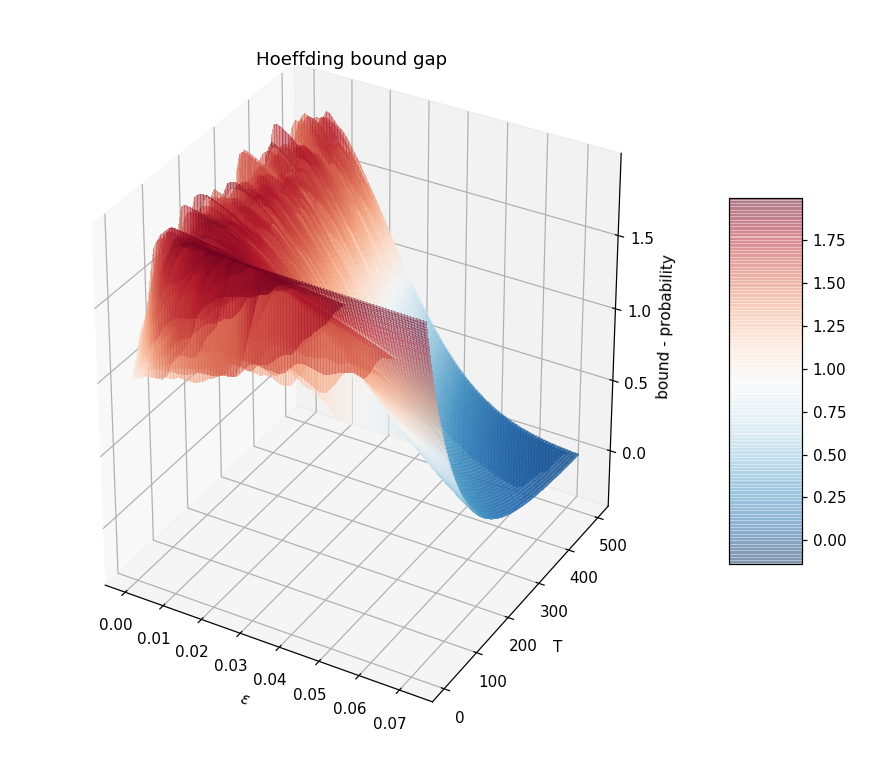

In [5]:
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection='3d')

xx, yy = np.meshgrid(eps, tt)
surf = ax.plot_surface(
    xx,
    yy,
    df_bounds.values - df_proba.values,
    alpha=0.3,
    cmap=cm.RdBu_r,
    rstride=1,
    cstride=1,
    linewidth=0,
    antialiased=False,
)

ax.set_xlabel('$\epsilon$')
ax.set_ylabel('T')
ax.set_zlabel('bound - probability')
ax.set_title('Hoeffding bound gap')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

## Bernstein

$(X_t)_{t=1, \dots, T}$ indepedent random variables such that $\forall t, \lvert X_t - \mathbb{E}[X_t]\rvert\leq M$ almost surely, $Var(X_t)=\sigma_t^2$, $\epsilon>0$.

* One-sided bound:
$$
\mathbb{P}\big(\sum_{t=1}^T X_t - \mathbb{E}[X_t] \geq \epsilon \big) \leq e^{-\frac{\epsilon^2}{2(\frac{\epsilon M}{3} + \sum_{t=1}^T\sigma^2_t)}}
$$

* Two-sided bound:
$$
\mathbb{P}\big(\lvert \sum_{t=1}^T X_t - \mathbb{E}[X_t]\rvert \geq \epsilon \big) \leq 2e^{-\frac{\epsilon^2}{2(\frac{\epsilon M}{3} + \sum_{t=1}^T\sigma^2_t)}}
$$


* Mean bound:
$$
\mathbb{P}\big(\lvert \frac{1}{T}\sum_{t=1}^T X_t - \mathbb{E}[X_t]\rvert \geq \epsilon \big) \leq 2e^{-\frac{\epsilon^2 T^2}{2(\frac{\epsilon T M}{3} + \sum_{t=1}^T\sigma^2_t)}}
$$

In [6]:
# number of MC simulations
n_sim = int(1e3)
# Length of each simulation
T = 1000

p = np.random.rand(T)
M = 2

df = pd.DataFrame(columns=range(n_sim), index=range(T))
for i in tqdm(range(n_sim)):
    # X is a sequence of T independent, non identically distributed Rademacher variables
    X = 2 * (np.random.rand(T) < p) - 1
    mu = 2 * p - 1
    df[i] = X - mu

df = df.cumsum(axis='columns').abs() / T
eps_min = df.min().min()
eps_max = df.max().max()
n_eps = 100
eps = np.linspace(eps_min, eps_max, n_eps)

tt = np.linspace(1, T, T)

df_proba = pd.DataFrame(columns=eps, index=range(T))
df_bounds = pd.DataFrame(columns=eps, index=range(T))
for e in eps:
    df_proba[e] = (df > e).mean(axis='columns')
    df_bounds[e] = 2 * np.exp(-0.5 * e ** 2 * tt ** 2 / (e * tt * M / 3 + 4 * np.cumsum(p * (1 - p))))

<IPython.core.display.Javascript object>


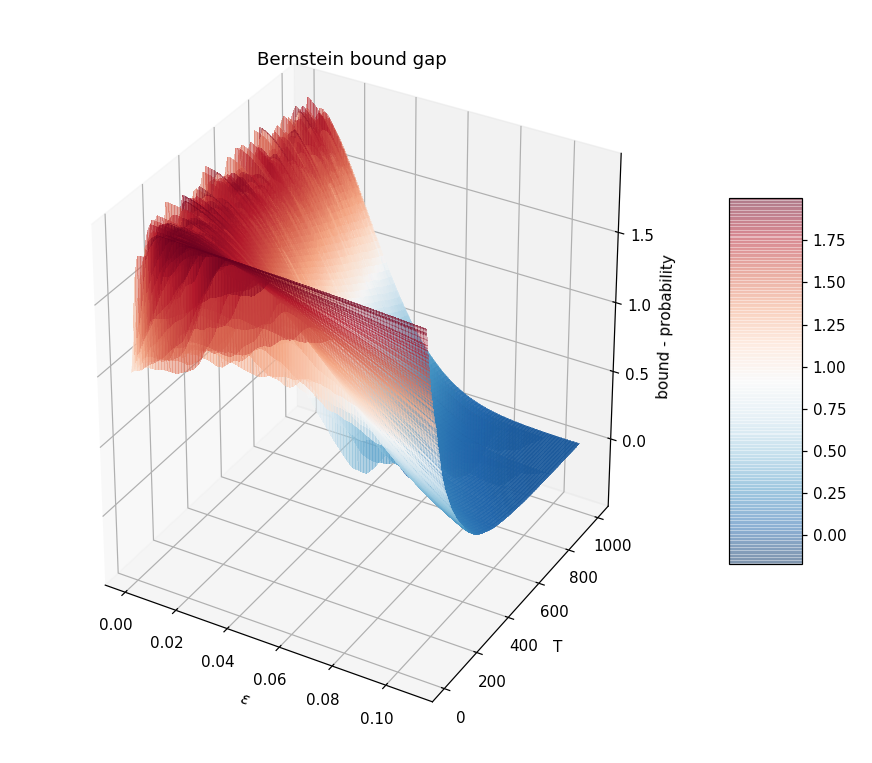

In [7]:
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection='3d')

xx, yy = np.meshgrid(eps, tt)
surf = ax.plot_surface(
    xx,
    yy,
    df_bounds.values - df_proba.values,
    alpha=0.3,
    cmap=cm.RdBu_r,
    rstride=1,
    cstride=1,
    linewidth=0,
    antialiased=False,
)

ax.set_xlabel('$\epsilon$')
ax.set_ylabel('T')
ax.set_zlabel('bound - probability')
ax.set_title('Bernstein bound gap')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()